In [43]:
'''Interpolation polynomial of Lagrange'''

expValues1 = [1, 1.10517, 1.22140, 1.34986]
x1 = [0, 0.1, 0.2, 0.3]
expValues2 = [1.10517, 1.16183, 1.22140, 1.34986]
x2 = [0.1, 0.15, 0.2, 0.3]

def omega (vector, length, variable):
    product = 1
    for i in range(length):
        product *= (variable - vector[i])
    return product
    
def Lagrange (nodes, vector, length, variable):
    for i in range(len(vector)):
        if vector[i] == variable:
            return nodes[i]
    omega1 = omega(vector, length, variable)
    P = 0
    for i in range(length):
        diff = 0
        for j in range(length):
            mem = 1
            for k in range(length):
                if k == j:
                    mem *= 1
                else:
                    mem *= (vector[i] - vector[k])
            diff += mem
        P += ((omega1 * nodes[i]) / (diff*(variable-vector[i])))
    return P

Major X-ticks locations: [-0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35]
Major X-ticks labels: <a list of 9 Text major ticklabel objects>
Major X-ticks tick lines: <a list of 18 Line2D ticklines objects>


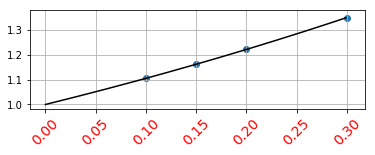

In [44]:
import matplotlib.pyplot as plt
x = [i/1000 for i in range(300)]
y = [Lagrange(expValues2, x2, len(x2), p[i]) for i in range(300)]

fig = plt.figure()
# Первая область рисования (мультиокно 1)
ax = fig.add_subplot(211)
ax.plot(x, y, 'k')
ax.scatter(x2,expValues2)
xax = ax.xaxis
yax = ax.yaxis
xlocs = xax.get_ticklocs()
print ('Major X-ticks locations:', xlocs)
xlabels = xax.get_ticklabels()
print ('Major X-ticks labels:', xlabels)
xlines = xax.get_ticklines()
print ('Major X-ticks tick lines:', xlines)
# Линии вспомогательной сетки (главные деления) только по оси абсцисс
xax.grid(True)
yax.grid(True)

for label in xlabels:
    # цвет подписи деленений оси OX
    label.set_color('red')
    # поворот подписей деленений оси OX 
    label.set_rotation(45)
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(14)


#print ('Lines on the axes:', type(line), line)
plt.show()